# 02 - Autoregressive Integrated Moving Average Models

by [Alejandro Correa Bahnsen](albahnsen.com/)

version 1.0, June 2020

## Part of the class [Advanced Methods in Data Analysis](https://github.com/albahnsen/AdvancedMethodsDataAnalysisClass)


This notebook is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). Special thanks goes to [TAVISH SRIVASTAVA]() and [Jason Brwnlee]()

# ARMA Time Series Modeling

ARMA models are commonly used in time series modeling. In ARMA model, AR stands for auto-regression and MA stands for moving average. 

## Auto-Regressive Time Series Model

Let’s understanding AR models using the case below:

The current GDP of a country say x(t) is dependent on the last year’s GDP i.e. x(t – 1). The hypothesis being that the total cost of production of products & services in a country in a fiscal year (known as GDP) is dependent on the set up of manufacturing plants / services in the previous year and the newly set up industries / plants / services in the current year. But the primary component of the GDP is the former one.

Hence, we can formally write the equation of GDP as:

`x(t) = alpha *  x(t – 1) + error (t)`

This equation is known as AR(1) formulation. The numeral one (1) denotes that the next instance is solely dependent on the previous instance.  The alpha is a coefficient which we seek so as to minimize the error function. Notice that x(t- 1) is indeed linked to x(t-2) in the same fashion. Hence, any shock to x(t) will gradually fade off in future.

For instance, let’s say x(t) is the number of juice bottles sold in a city on a particular day. During winters, very few vendors purchased juice bottles. Suddenly, on a particular day, the temperature rose and the demand of juice bottles soared to 1000. However, after a few days, the climate became cold again. But, knowing that the people got used to drinking juice during the hot days, there were 50% of the people still drinking juice during the cold days. In following days, the proportion went down to 25% (50% of 50%) and then gradually to a small number after significant number of days. The following graph explains the inertia property of AR series:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

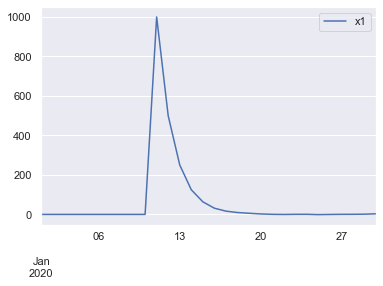

In [3]:
e = np.random.randn(30)
s = np.zeros(30)

s[10] = 1000

for i in range(11, 30):
    s[i] = 0.5 * s[i-1] + e[i]

ts = pd.DataFrame(s, 
                  index=pd.date_range("2020-01-01", periods=30),
                  columns=['x1'])
ts.plot()

## Moving Average Time Series Model
Let’s take another case to understand Moving average time series model.

A manufacturer produces a certain type of bag, which was readily available in the market. Being a competitive market, the sale of the bag stood at zero for many days. So, one day he did some experiment with the design and produced a different type of bag. This type of bag was not available anywhere in the market. Thus, he was able to sell the entire stock of 1000 bags (lets call this as x(t) ). The demand got so high that the bag ran out of stock. As a result, some 100 odd customers couldn’t purchase this bag. Lets call this gap as the error at that time point. With time, the bag had lost its woo factor. But still few customers were left who went empty handed the previous day. Following is a simple formulation to depict the scenario :

`x(t) = beta *  error(t-1) + error (t)`

If we try plotting this graph, it will look something like this:

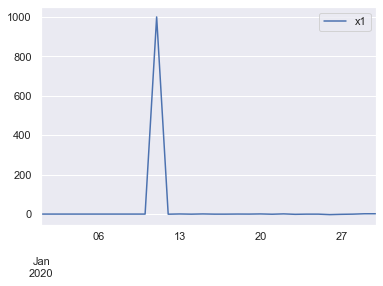

In [4]:
e = np.random.randn(30)
s = np.zeros(30)

s[10] = 1000

for i in range(11, 30):
    s[i] = 0.5 * e[i-1] + e[i]

ts = pd.DataFrame(s, 
                  index=pd.date_range("2020-01-01", periods=30),
                  columns=['x1'])
ts.plot()

Did you notice the difference between MA and AR model? In MA model, noise / shock quickly vanishes with time. The AR model has a much lasting effect of the shock.

## Difference between AR and MA models
The primary difference between an AR and MA model is based on the correlation between time series objects at different time points. The correlation between x(t) and x(t-n) for n > order of MA is always zero. This directly flows from the fact that covariance between x(t) and x(t-n) is zero for MA models (something which we refer from the example taken in the previous section). However, the correlation of x(t) and x(t-n) gradually declines with n becoming larger in the AR model. This difference gets exploited irrespective of having the AR model or MA model. The correlation plot can give us the order of MA model.

## Autocorrelation Plot
Once we have got the stationary time series, we must answer two primary questions:

- Q1. Is it an AR or MA process?

- Q2. What order of AR or MA process do we need to use?

The trick to solve these questions is available in the previous section. Didn’t you notice?

The first question can be answered using Total Correlation Chart (also known as Auto – correlation Function / ACF). ACF is a plot of total correlation between different lag functions. For instance, in GDP problem, the GDP at time point t is x(t). We are interested in the correlation of x(t) with x(t-1) , x(t-2) and so on. 



In [5]:
from statsmodels.graphics.tsaplots import plot_acf

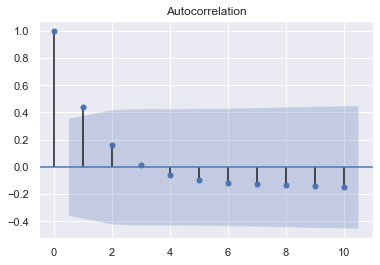

In [6]:
e = np.random.randn(30)
s = np.zeros(30)

s[10] = 1000

for i in range(11, 30):
    s[i] = 0.5 * s[i-1] + e[i]

ts = pd.DataFrame(s, 
                  index=pd.date_range("2020-01-01", periods=30),
                  columns=['x1'])

plot_acf(ts, lags=10);

Confidence intervals are drawn as a cone. By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation and not a statistical fluke.

In a moving average series of lag n, we will not get any correlation between x(t) and x(t – n -1) . Hence, the total correlation chart cuts off at nth lag. So it becomes simple to find the lag for a MA series. For an AR series this correlation will gradually go down without any cut off value. So what do we do if it is an AR series?



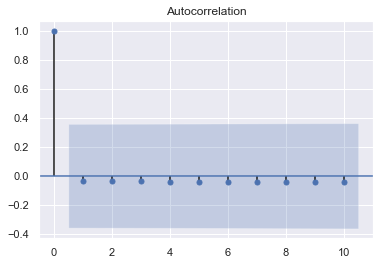

In [7]:
e = np.random.randn(30)
s = np.zeros(30)

s[10] = 1000

for i in range(11, 30):
    s[i] = 0.5 * e[i-1] + e[i]

ts = pd.DataFrame(s, 
                  index=pd.date_range("2020-01-01", periods=30),
                  columns=['x1'])

plot_acf(ts, lags=10);

## Partial Autocorrelation Function
A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps.

It is these indirect correlations that the partial autocorrelation function seeks to remove. Without going into the math, this is the intuition for the partial autocorrelation.

The example below will load the Minimum Daily Temperatures and graph the time series.



In [20]:
temp = pd.read_csv('../datasets/daily-min-temperatures.csv', header=0, index_col=0)
temp.plot(figsize=(10, 5));

FileNotFoundError: [Errno 2] File b'../datasets/daily-min-temperatures.csv' does not exist: b'../datasets/daily-min-temperatures.csv'

In [9]:
plot_acf(temp, lags=50);

NameError: name 'temp' is not defined

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(temp, lags=50);

NameError: name 'temp' is not defined

## Intuition for ACF and PACF Plots
Plots of the autocorrelation function and the partial autocorrelation function for a time series tell a very different story.

We can use the intuition for ACF and PACF above to explore some thought experiments.

### Autoregression Intuition
Consider a time series that was generated by an autoregression (AR) process with a lag of k.

We know that the ACF describes the autocorrelation between an observation and another observation at a prior time step that includes direct and indirect dependence information.

This means we would expect the ACF for the AR(k) time series to be strong to a lag of k and the inertia of that relationship would carry on to subsequent lag values, trailing off at some point as the effect was weakened.

We know that the PACF only describes the direct relationship between an observation and its lag. This would suggest that there would be no correlation for lag values beyond k.

This is exactly the expectation of the ACF and PACF plots for an AR(k) process.

### Moving Average Intuition
Consider a time series that was generated by a moving average (MA) process with a lag of k.

Remember that the moving average process is an autoregression model of the time series of residual errors from prior predictions. Another way to think about the moving average model is that it corrects future forecasts based on errors made on recent forecasts.

We would expect the ACF for the MA(k) process to show a strong correlation with recent values up to the lag of k, then a sharp decline to low or no correlation. By definition, this is how the process was generated.

For the PACF, we would expect the plot to show a strong relationship to the lag and a trailing off of correlation from the lag onwards.

Again, this is exactly the expectation of the ACF and PACF plots for an MA(k) process.

# Autoregressive Integrated Moving Average Model
An ARIMA model is a class of statistical models for analyzing and forecasting time series data.

It explicitly caters to a suite of standard structures in time series data, and as such provides a simple yet powerful method for making skillful time series forecasts.

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration.

This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

- AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
- I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
- MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.
Each of these components are explicitly specified in the model as a parameter. A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.

The parameters of the ARIMA model are defined as follows:

- p: The number of lag observations included in the model, also called the lag order.
- d: The number of times that the raw observations are differenced, also called the degree of differencing.
- q: The size of the moving average window, also called the order of moving average.
A linear regression model is constructed including the specified number and type of terms, and the data is prepared by a degree of differencing in order to make it stationary, i.e. to remove trend and seasonal structures that negatively affect the regression model.

A value of 0 can be used for a parameter, which indicates to not use that element of the model. This way, the ARIMA model can be configured to perform the function of an ARMA model, and even a simple AR, I, or MA model.

Adopting an ARIMA model for a time series assumes that the underlying process that generated the observations is an ARIMA process. This may seem obvious, but helps to motivate the need to confirm the assumptions of the model in the raw observations and in the residual errors of forecasts from the model.

Next, let’s take a look at how we can use the ARIMA model in Python. We will start with loading a simple univariate time series.

### Shampoo Sales Dataset
This dataset describes the monthly number of sales of shampoo over a 3 year period.

The units are a sales count and there are 36 observations. The original dataset is credited to Makridakis, Wheelwright, and Hyndman (1998).

Download the dataset.
Download the dataset and place it in your current working directory with the filename “shampoo-sales.csv“.

Below is an example of loading the Shampoo Sales dataset with Pandas with a custom function to parse the date-time field. The dataset is baselined in an arbitrary year, in this case 1900.

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


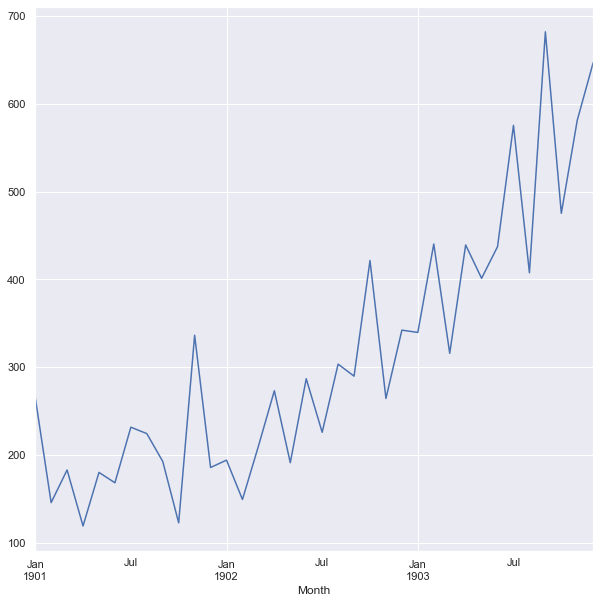

In [11]:
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')
 
series = pd.read_csv('../datasets/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot(figsize=(10, 10));

We can see that the Shampoo Sales dataset has a clear trend.

This suggests that the time series is not stationary and will require differencing to make it stationary, at least a difference order of 1.

Let’s also take a quick look at an autocorrelation plot of the time series.

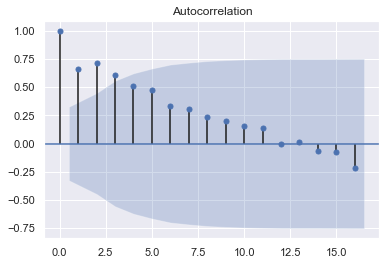

In [12]:
plot_acf(series);

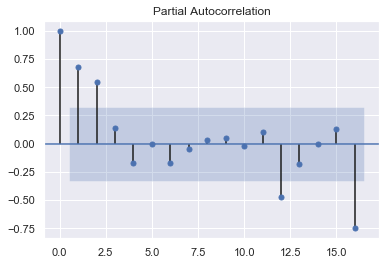

In [13]:
plot_pacf(series);

An ARIMA model can be created using the statsmodels library as follows:

1. Define the model by calling ARIMA() and passing in the p, d, and q parameters.
2. The model is prepared on the training data by calling the fit() function.
3. Predictions can be made by calling the predict() function and specifying the index of the time or times to be predicted.
Let’s start off with something simple. We will fit an ARIMA model to the entire Shampoo Sales dataset and review the residual errors.

First, we fit an ARIMA(5,1,0) model. This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.

When fitting the model, a lot of debug information is provided about the fit of the linear regression model. We can turn this off by setting the disp argument to 0.

In [28]:
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Thu, 18 Jun 2020   AIC                            406.340
Time:                        18:27:56   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903            

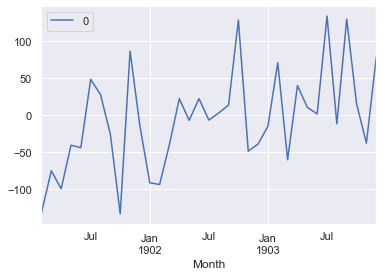

In [29]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

First, we get a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model.

Los errores deberian tener media cero y varianza constante (los errores se distribuyan normalmente)

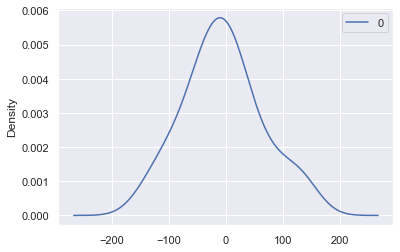

0
count   35.000000
mean    -5.495216
std     68.132882
min   -133.296656
25%    -42.477819
50%     -7.186509
75%     24.748311
max    133.237940


In [16]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

Next, we get a density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero.

The distribution of the residual errors is displayed. The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals).

Note, that although above we used the entire dataset for time series analysis, ideally we would perform this analysis on just the training dataset when developing a predictive model.

Next, let’s look at how we can use the ARIMA model to make forecasts.

## Rolling Forecast ARIMA Model
The ARIMA model can be used to forecast future time steps.

We can use the predict() function on the ARIMA Results object to make predictions. It accepts the index of the time steps to make predictions as arguments. These indexes are relative to the start of the training dataset used to make predictions.

If we used 100 observations in the training dataset to fit the model, then the index of the next time step for making a prediction would be specified to the prediction function as start=101, end=101. This would return an array with one element containing the prediction.

We also would prefer the forecasted values to be in the original scale, in case we performed any differencing (d>0 when configuring the model). This can be specified by setting the typ argument to the value ‘levels’: typ=’levels’.

Alternately, we can avoid all of these specifications by using the forecast() function, which performs a one-step forecast using the model.

We can split the training dataset into train and test sets, use the train set to fit the model, and generate a prediction for each element on the test set.

A rolling forecast is required given the dependence on observations in prior time steps for differencing and the AR model. A crude way to perform this rolling forecast is to re-create the ARIMA model after each new observation is received.

We manually keep track of all observations in a list called history that is seeded with the training data and to which new observations are appended each iteration.

Putting this all together, below is an example of a rolling forecast with the ARIMA model in Python.

In [30]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast() #pronostica un solo dato
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=349.117692, expected=342.300000
predicted=306.512866, expected=339.700000
predicted=387.376465, expected=440.400000
predicted=348.154144, expected=315.900000
predicted=386.308801, expected=439.300000
predicted=356.082088, expected=401.300000
predicted=446.379471, expected=437.400000
predicted=394.737288, expected=575.500000
predicted=434.915413, expected=407.600000
predicted=507.923472, expected=682.000000
predicted=435.482761, expected=475.300000
predicted=652.743901, expected=581.300000
predicted=546.343472, expected=646.900000


Running the example prints the prediction and expected value each iteration.

We can also calculate a final mean squared error score (MSE) for the predictions, providing a point of comparison for other ARIMA configurations.

In [18]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 6958.326


A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red). We can see the values show some trend and are in the correct scale.

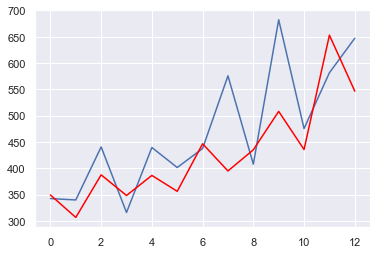

In [19]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

The model could use further tuning of the p, d, and maybe even the q parameters.



## Configuring an ARIMA Model
The classical approach for fitting an ARIMA model is to follow the Box-Jenkins Methodology.

This is a process that uses time series analysis and diagnostics to discover good parameters for the ARIMA model.

In summary, the steps of this process are as follows:

1. Model Identification. Use plots and summary statistics to identify trends, seasonality, and autoregression elements to get an idea of the amount of differencing and the size of the lag that will be required.
2. Parameter Estimation. Use a fitting procedure to find the coefficients of the regression model.
3. Model Checking. Use plots and statistical tests of the residual errors to determine the amount and type of temporal structure not captured by the model.
The process is repeated until either a desirable level of fit is achieved on the in-sample or out-of-sample observations (e.g. training or test datasets).

The process was described in the classic 1970 textbook on the topic titled Time Series Analysis: Forecasting and Control by George Box and Gwilym Jenkins. An updated 5th edition is now available if you are interested in going deeper into this type of model and methodology.

Given that the model can be fit efficiently on modest-sized time series datasets, grid searching parameters of the model can be a valuable approach.
